In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [39]:



# Read the Excel file into a DataFrame
df = pd.read_excel('/content/ramen-ratings.xlsx')
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [26]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [27]:
# prompt: necesito cuando datos unicos hay que cada variable

unique_counts = df.nunique()
print("Unique value counts for each variable:")
print(unique_counts)


Unique value counts for each variable:
Review #    2580
Brand        355
Variety     2412
Style          7
Country       38
Stars         43
Top Ten       38
dtype: int64


In [28]:
df.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


Missing values:
Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

Duplicate rows:
0


<Axes: >

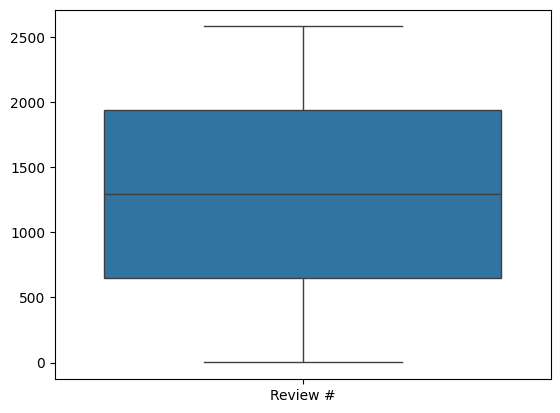

In [40]:
#Pregunta 1:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())

# Check for outliers
import seaborn as sns
sns.boxplot(data=df)



In [41]:

# Remove rows with "Unrated" in the "Stars" column
df = df[df['Stars'] != 'Unrated']

# Change the data type of the "Stars" column to float
df['Stars'] = df['Stars'].astype(float)
df.info()
ramen_data = df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2577 non-null   int64  
 1   Brand     2577 non-null   object 
 2   Variety   2577 non-null   object 
 3   Style     2575 non-null   object 
 4   Country   2577 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 161.1+ KB


<ipython-input-41-b24ec272fd97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stars'] = df['Stars'].astype(float)


Los valores atipicos son normales dentro de esta variable, pertenecen a la cantidad de estrellas que tiene el restaurant de ramen por lo que no se realizará ningun tipo de limpieza de atipicos

In [42]:
# Crear una columna binaria basada en 'Top Ten', donde 1 indica que el ramen ha estado en el top ten y 0 que no
ramen_data['Is_Top_Ten'] = ramen_data['Top Ten'].notnull().astype(int)


ramen_data_cleaned = ramen_data.dropna(subset=['Stars'])

# Verificar los cambios realizados, mostrando la suma de valores nulos por columna y las primeras filas del dataset limpio
null_values_summary = ramen_data_cleaned.isnull().sum()
ramen_data_cleaned.head(), null_values_summary

(   Review #           Brand  \
 0      2580       New Touch   
 1      2579        Just Way   
 2      2578          Nissin   
 3      2577         Wei Lih   
 4      2576  Ching's Secret   
 
                                              Variety Style Country  Stars  \
 0                           T's Restaurant Tantanmen   Cup   Japan   3.75   
 1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan   1.00   
 2                      Cup Noodles Chicken Vegetable   Cup     USA   2.25   
 3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan   2.75   
 4                                    Singapore Curry  Pack   India   3.75   
 
   Top Ten  Is_Top_Ten  
 0     NaN           0  
 1     NaN           0  
 2     NaN           0  
 3     NaN           0  
 4     NaN           0  ,
 Review #         0
 Brand            0
 Variety          0
 Style            2
 Country          0
 Stars            0
 Top Ten       2536
 Is_Top_Ten       0
 dtype: int64)

In [43]:
# Calcular la media de la columna 'Stars'
stars_mean = ramen_data_cleaned['Stars'].mean()

# Crear una nueva columna 'Quality' basada en si 'Stars' está por encima o por debajo de la media
ramen_data_cleaned['Quality'] = ['Bueno' if stars > stars_mean else 'Malo' for stars in ramen_data_cleaned['Stars']]

# Mostrar las primeras filas para verificar los cambios
ramen_data_cleaned.head(), stars_mean


(   Review #           Brand  \
 0      2580       New Touch   
 1      2579        Just Way   
 2      2578          Nissin   
 3      2577         Wei Lih   
 4      2576  Ching's Secret   
 
                                              Variety Style Country  Stars  \
 0                           T's Restaurant Tantanmen   Cup   Japan   3.75   
 1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan   1.00   
 2                      Cup Noodles Chicken Vegetable   Cup     USA   2.25   
 3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan   2.75   
 4                                    Singapore Curry  Pack   India   3.75   
 
   Top Ten  Is_Top_Ten Quality  
 0     NaN           0   Bueno  
 1     NaN           0    Malo  
 2     NaN           0    Malo  
 3     NaN           0    Malo  
 4     NaN           0   Bueno  ,
 3.6546759798214974)

In [44]:

# Aplicar get_dummies a las columnas 'Brand' y 'Country'
ramen_data_dummies = pd.get_dummies(ramen_data_cleaned, columns=['Brand', 'Country','Style'])

# Mostrar las primeras filas para verificar los cambios y el nuevo tamaño del DataFrame
ramen_data_dummies.head(), ramen_data_dummies.shape

(   Review #                                            Variety  Stars Top Ten  \
 0      2580                           T's Restaurant Tantanmen   3.75     NaN   
 1      2579  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...   1.00     NaN   
 2      2578                      Cup Noodles Chicken Vegetable   2.25     NaN   
 3      2577                      GGE Ramen Snack Tomato Flavor   2.75     NaN   
 4      2576                                    Singapore Curry   3.75     NaN   
 
    Is_Top_Ten Quality  Brand_1 To 3 Noodles  Brand_7 Select  \
 0           0   Bueno                     0               0   
 1           0    Malo                     0               0   
 2           0    Malo                     0               0   
 3           0    Malo                     0               0   
 4           0   Bueno                     0               0   
 
    Brand_7 Select/Nissin  Brand_A-One  ...  Country_USA  \
 0                      0            0  ...            0   


In [46]:
# prompt: Elimina las columnas  Top Ten, Review #, Variety

ramen_data_dummies = ramen_data_dummies.drop(['Top Ten', 'Review #', 'Variety','Stars'], axis=1)
ramen_data_dummies



,Is_Top_Ten,Quality,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,...,Country_USA,Country_United States,Country_Vietnam,Style_Bar,Style_Bowl,Style_Box,Style_Can,Style_Cup,Style_Pack,Style_Tray
0,0,Bueno,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,Malo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,Malo,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,Malo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,Bueno,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,Malo,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2576,0,Malo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2577,0,Malo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2578,0,Malo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
# Pregunta 2 y 3:

df=ramen_data_dummies

# Separar las características (X) de la variable objetivo (y)
X = df.drop('Quality', axis=1)
y = df['Quality']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verificar el tamaño de los conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2061, 401), (516, 401), (2061,), (516,))

In [55]:

# Inicializar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)

# Calcular la precisión y generar el reporte de clasificación
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

accuracy_logistic, classification_report_logistic


(0.6414728682170543,
 '              precision    recall  f1-score   support\n\n       Bueno       0.68      0.75      0.71       302\n        Malo       0.58      0.50      0.53       214\n\n    accuracy                           0.64       516\n   macro avg       0.63      0.62      0.62       516\nweighted avg       0.64      0.64      0.64       516\n')

In [57]:


# Inicializar el modelo Support Vector Machine
svm_model = SVC(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión y generar el reporte de clasificación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, classification_report_svm


(0.6492248062015504,
 '              precision    recall  f1-score   support\n\n       Bueno       0.69      0.74      0.71       302\n        Malo       0.59      0.53      0.56       214\n\n    accuracy                           0.65       516\n   macro avg       0.64      0.63      0.63       516\nweighted avg       0.65      0.65      0.65       516\n')

Para el modelo de regresión logistico tenenmos

Precisión para 'Bueno': 68%, con un recall de 75% y un F1-score de 71%.

Precisión para 'Malo': 58%, con un recall de 50% y un F1-score de 53%.

Para el modelo SVM tenemos:
Precisión para 'Bueno': 69%, con un recall de 74% y un F1-score de 71%.

Precisión para 'Malo': 59%, con un recall de 53% y un F1-score de 56%.

Estos resultados muestran que el modelo SVM tiene un desempeño ligeramente mejor en clasificar las observaciones como "Bueno" o "Malo" en comparación con la Regresión Logística, aunque la diferencia no es significativa.

In [59]:


# Definir el espacio de hiperparámetros para la Regresión Logística
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Inicializar GridSearchCV para la Regresión Logística
grid_search_logistic = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                    param_grid=param_grid_logistic,
                                    cv=5,
                                    scoring='accuracy',
                                    n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search_logistic.fit(X_train, y_train)

# Mejores hiperparámetros y precisión para Regresión Logística
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_

# Definir el espacio de hiperparámetros para SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Inicializar GridSearchCV para SVM
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svm,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

# Ajustar GridSearchCV al conjunto de entrenamiento para SVM
grid_search_svm.fit(X_train, y_train)

# Mejores hiperparámetros y precisión para SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

best_params_logistic, best_score_logistic, best_params_svm, best_score_svm


({'C': 1, 'solver': 'newton-cg'},
 0.6734596487928725,
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'},
 0.6681186675756365)

C = 1 sugiere que existe un quilibrio entre la complejidad del modelo y su capacidad para generalizar

solver = newton-cg sugiere que este metodo de optimizacion es adecuado para datasets grandes y maneja bien la multicolinealidad o corr alta entre variables.

(Cross-Validation): 0.6734. Esto indica que, en promedio, el modelo de Regresión Logística optimizado tiene una precisión del 67.34% en la clasificación de los datos como "Bueno" o "Malo" utilizando validación cruzada.

gamma = scale indica que el coeficiente de kernel para 'rbf', 'poly' y 'sigmoid' se calcula automáticamente a partir de los datos, lo cual es recomendable para muchos casos prácticos.
kernel  = rbf
(Radial Basis Function) es comúnmente usado en SVM y es efectivo para espacios de características que no son linealmente separables.

(Cross-Validation): 0.6681. Esto significa que el modelo SVM optimizado tiene una precisión promedio del 66.81% en la clasificación de los datos, según la validación cruzada.

In [60]:
# Reentrenar el modelo de Regresión Logística con hiperparámetros óptimos
logistic_opt = LogisticRegression(C=1, solver='newton-cg', max_iter=1000, random_state=42)
logistic_opt.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_logistic_opt = logistic_opt.predict(X_test)
accuracy_logistic_opt = accuracy_score(y_test, y_pred_logistic_opt)
classification_report_logistic_opt = classification_report(y_test, y_pred_logistic_opt)

# Reentrenar el modelo SVM con hiperparámetros óptimos
svm_opt = SVC(C=1, gamma='scale', kernel='rbf', random_state=42)
svm_opt.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_svm_opt = svm_opt.predict(X_test)
accuracy_svm_opt = accuracy_score(y_test, y_pred_svm_opt)
classification_report_svm_opt = classification_report(y_test, y_pred_svm_opt)

accuracy_logistic_opt, classification_report_logistic_opt, accuracy_svm_opt, classification_report_svm_opt


(0.6414728682170543,
 '              precision    recall  f1-score   support\n\n       Bueno       0.68      0.75      0.71       302\n        Malo       0.58      0.50      0.53       214\n\n    accuracy                           0.64       516\n   macro avg       0.63      0.62      0.62       516\nweighted avg       0.64      0.64      0.64       516\n',
 0.6492248062015504,
 '              precision    recall  f1-score   support\n\n       Bueno       0.69      0.74      0.71       302\n        Malo       0.59      0.53      0.56       214\n\n    accuracy                           0.65       516\n   macro avg       0.64      0.63      0.63       516\nweighted avg       0.65      0.65      0.65       516\n')

Precisión global del modelo Regresion Logistica: 64%

Precisión global del modelo SVM: 65%

Al comparar con los resultados previos a la optimización de hiperparámetros, parece que los modelos han mejorado ligeramente en términos de precisión global. El modelo SVM ha superado marginalmente a la Regresión Logística en precisión global, aunque con diferencias pequeñas en las otras métricas.